# Setup

In [29]:
import kagglehub

install = False
if install:
    path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

    print("Path to dataset files:", path)

In [30]:
import pandas 
import os

# path to the dataset files so don't have to run above cell again
path = os.path.expanduser('~') +  "/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1"

# read data into dataframe
data_30_sec = pandas.read_csv(path + "/Data/features_30_sec.csv")
data_3_sec = pandas.read_csv(path + "/Data/features_3_sec.csv")

# Exploratory data analysis

In [31]:
# standard imports
import matplotlib.pyplot as plt
import seaborn as sb
import librosa
plt.style.use('ggplot')

In [32]:
# missing data?
data_30_sec.head(10)
data_30_sec.describe()
data_30_sec.isnull().sum() # no missing data, data seems clean

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

## Basic plots with metadata 

Text(0.5, 1.0, 'Correlation between features')

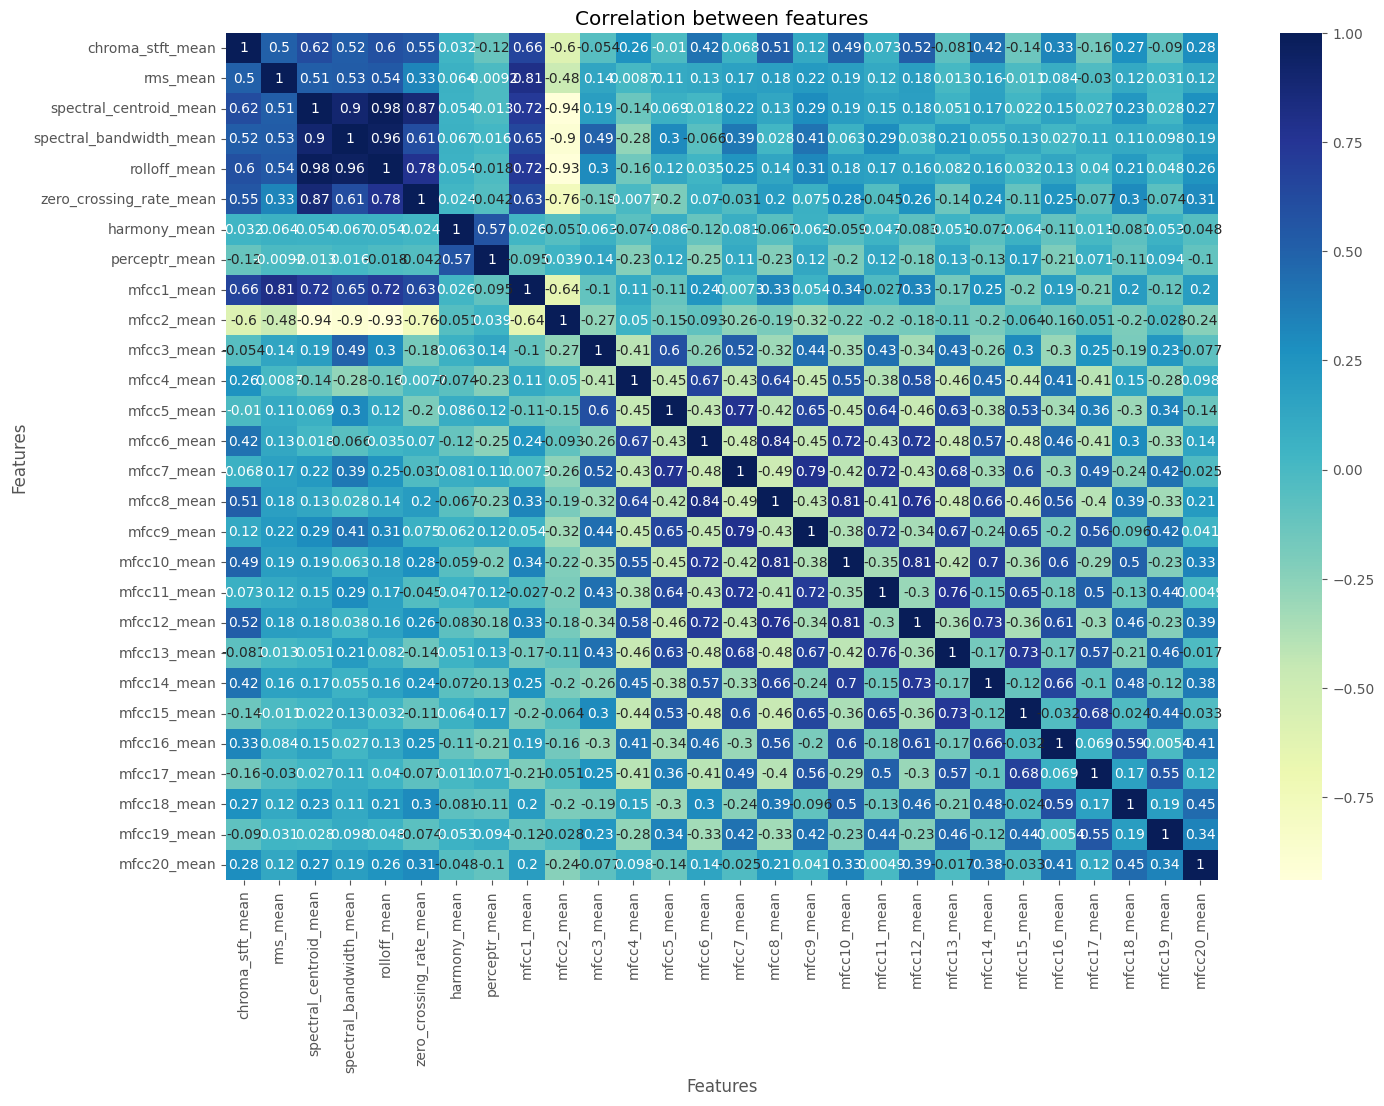

In [33]:
# Getting all the columns that have the mean data
mean_cols = [col for col in data_30_sec.columns if 'mean' in col]

fig, ax = plt.subplots(figsize=(16, 11));

dataplot = sb.heatmap(data_30_sec[mean_cols].corr(numeric_only=True), cmap="YlGnBu", annot=True)
ax.set_xlabel('Features')
ax.set_ylabel('Features')
ax.set_title('Correlation between features')
# There seems to be lots of moderately strong correlations between features, which should be useful in classification


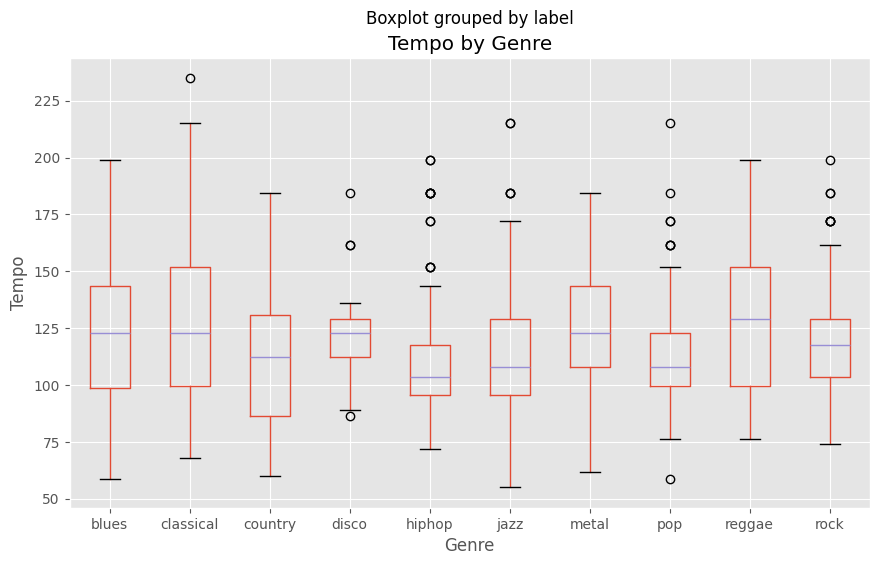

In [34]:
# plot tempo by genre
fig, ax = plt.subplots(figsize=(10, 6))
data_30_sec[['label', 'tempo']].boxplot(by = "label",ax=ax)
ax.set_title("Tempo by Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Tempo")
plt.show()

# Tempo seems somewhat predictive of genre but there is a lot of overlap between genres

## Looking at the actual music data

In [35]:
import random
import os

# Choose a random music file
music_data_path = path + "/Data/genres_original/"
genre = ''
while not genre:
    genre = random.choice(os.listdir(music_data_path))
    
    # Skip if we come across some kind of hidden file
    if (genre[0] == '.'):
        genre = ''

music_data_path += f'{genre}/'
music_data_path += random.choice(os.listdir(music_data_path))

x , sr = librosa.load(music_data_path)

In [36]:
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(661504,) 22050
